In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

### 1. Business Understanding
### Prepare a classification model using SVM for salary data 

In [2]:
salarydata_train = pd.read_csv('SalaryData_Train(1).csv')
salarydata_test = pd.read_csv('SalaryData_Test(1).csv')

In [3]:
salarydata_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
salarydata_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### 2. Data Preparation and Data Description

### Age -- age of a person
### Workclass	-- A work class is a grouping of work 
### Education	-- Education of an individuals	
### Maritalstatus -- Marital status of an individulas	
### Ooccupation	 -- occupation of an individuals
### Relationship -- 	
### Race --  Race of an Individual
### Sex --  Gender of an Individual
### Capitalgain --  profit received from the sale of an investment	
### Capitalloss	-- A decrease in the value of a capital asset
### Hoursperweek -- number of hours work per week	
### Native -- Native of an individual
### Salary -- salary of an individual

In [5]:
salarydata = salarydata_test.append(salarydata_train)

In [6]:
sd_train = salarydata_train.copy()
sd_test = salarydata_test.copy()

In [7]:
sd_train.shape

(30161, 14)

In [8]:
sd_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
sd_test.shape

(15060, 14)

In [10]:
sd_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [11]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [12]:
number = LabelEncoder()

In [13]:
for i in str_c:
    sd_train[i]= number.fit_transform(sd_train[i])
    sd_test[i]=number.fit_transform(sd_test[i])

In [14]:
sd_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [15]:
sd_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [16]:
mapping = {' >50K': 1, ' <=50K': 2}

In [17]:
sd_train = sd_train.replace({'Salary': mapping})
sd_test = sd_test.replace({'Salary': mapping})

In [18]:
salarydata = sd_train.append(sd_test)

In [19]:
salarydata1 = salarydata.copy()

In [20]:
salarydata1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2


In [21]:
salarydata1.shape

(45221, 14)

In [22]:
salarydata1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45221.0,38.548086,13.217981,17.0,28.0,37.0,47.0,90.0
workclass,45221.0,2.204507,0.958132,0.0,2.0,2.0,2.0,6.0
education,45221.0,10.313217,3.816992,0.0,9.0,11.0,12.0,15.0
educationno,45221.0,10.118463,2.552909,1.0,9.0,10.0,13.0,16.0
maritalstatus,45221.0,2.585148,1.500460,0.0,2.0,2.0,4.0,6.0
occupation,45221.0,5.969572,4.026444,0.0,2.0,6.0,9.0,13.0
relationship,45221.0,1.412684,1.597242,0.0,0.0,1.0,3.0,5.0
race,45221.0,3.680281,0.832361,0.0,4.0,4.0,4.0,4.0
sex,45221.0,0.675062,0.468357,0.0,0.0,1.0,1.0,1.0
capitalgain,45221.0,1101.454700,7506.511295,0.0,0.0,0.0,0.0,99999.0


In [23]:
salarydata1.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int64
dtype: object

In [24]:
salarydata1.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

### 3. Finding Correlation

In [25]:
corr = salarydata1.corr()

<AxesSubplot:>

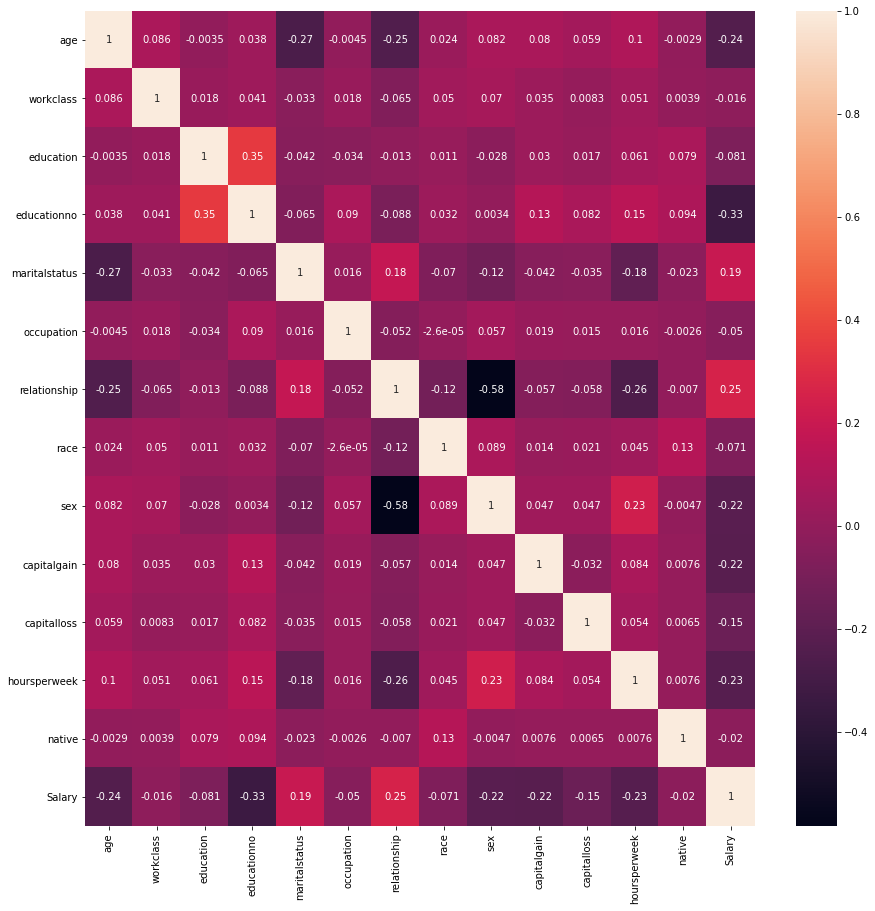

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

Skew:-0.31062061074424
Kurtosis:0.6350448194491634


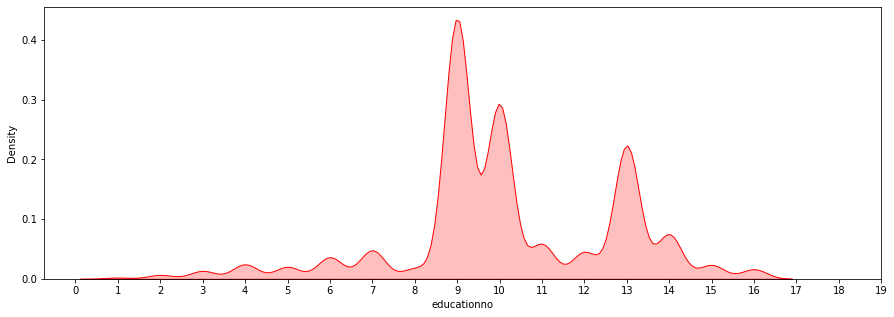

In [27]:
plt.rcParams["figure.figsize"] = 9,5

plt.figure(figsize=(15,5))
print("Skew:{}".format(salarydata1['educationno'].skew()))
print("Kurtosis:{}".format(salarydata1['educationno'].kurtosis()))
ax = sns.kdeplot(salarydata1['educationno'],shade = True, color='r')
plt.xticks([i for i in range (0,20,1)])
plt.show()

### The Data is negatively skewed and has low kurtosis value
### Most of people have eduction Number of years of education 9 - 10

In [28]:
sd = salarydata[salarydata.columns[0:13]]

In [29]:
obj_col =sd.select_dtypes(include='object').columns.tolist()

In [30]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_col,1):
    plt.subplot(2,2,i)
    sns.countplot(data=sd,y=col)
    plt.subplot(2,2,i+2)
    salarydata[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

<Figure size 1152x720 with 0 Axes>

### Majority of the workclass is in Private Sector
### Also the Education majority of the people have HS graduation/ some college degree

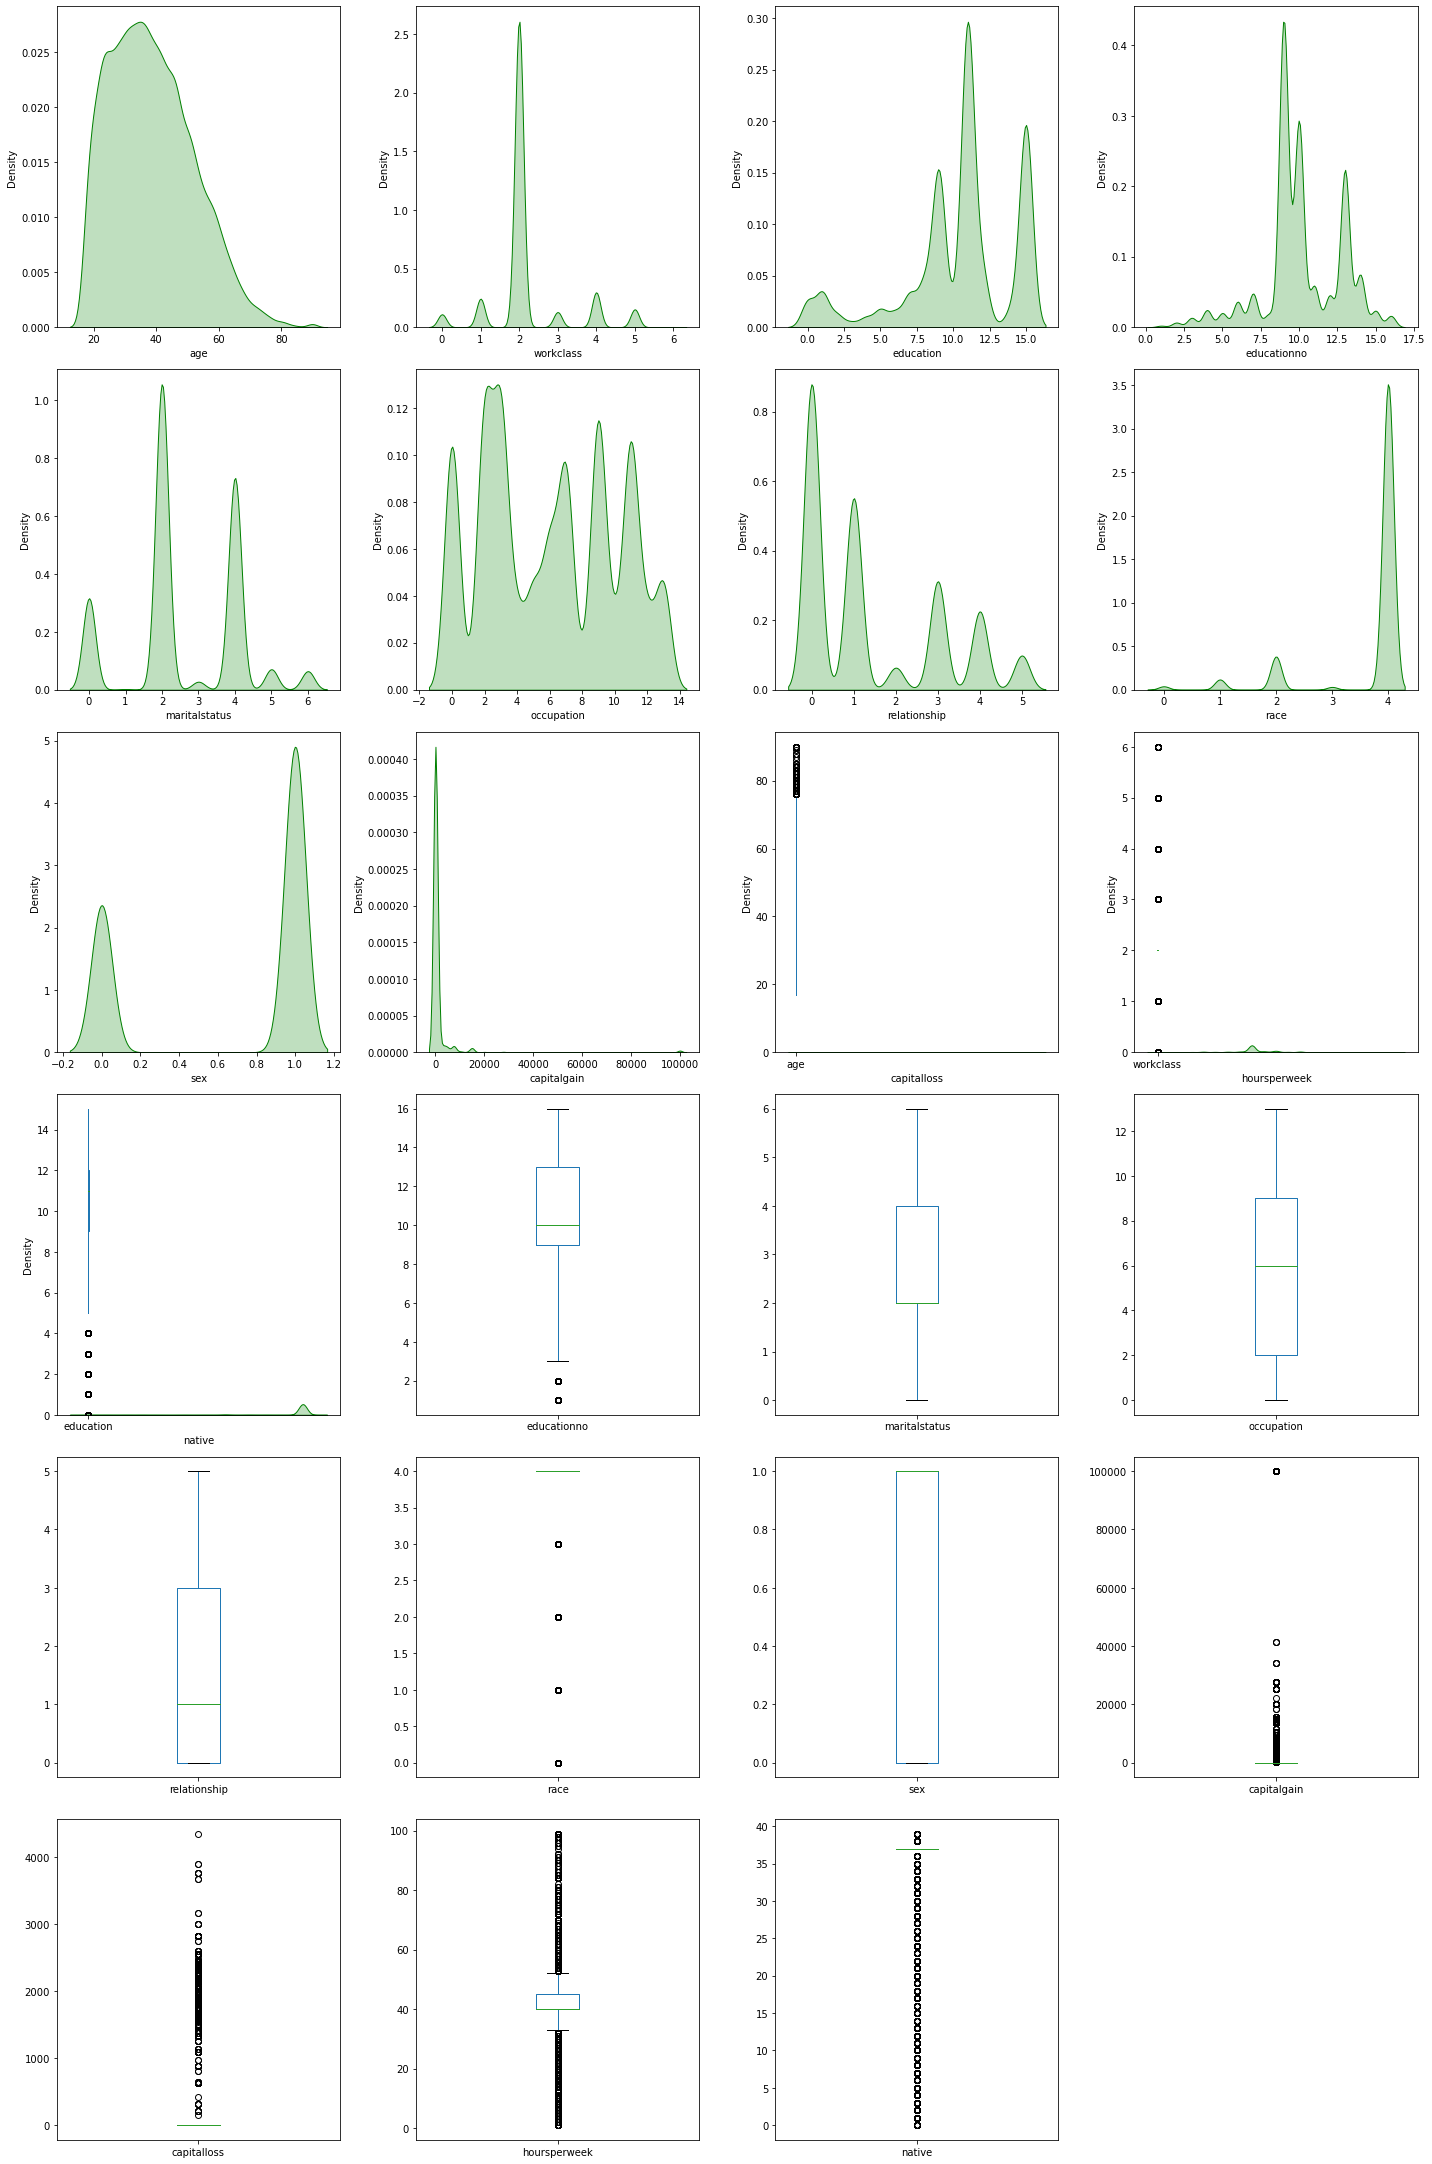

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
skewness,0.532784,1.148931,-0.945666,-0.310621,-0.006760,0.107141,0.829192,-2.518388,-0.747594,11.788871,4.517536,0.340536,-4.173813
kurtosis,-0.155931,2.329983,0.773506,0.635045,-0.538981,-1.249883,-0.697095,5.350390,-1.441168,150.147899,19.376085,3.201287,17.322823


In [35]:
num_columns = sd.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(20,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(sd[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    sd[col].plot.box()
plt.tight_layout()
plt.show()

num_data = sd[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

### 4.Support Vector Machine

In [36]:
col = salarydata1.columns

In [37]:
x_train = sd_train[col[0:13]]
y_train = sd_train[col[13]]
x_test = sd_test[col[0:13]]
y_test = sd_test[col[13]]

In [38]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [39]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

### 4.1 Linear

In [40]:
model_linear = SVC(kernel="linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred_test_linear))

Accuracy: 0.8096945551128818


### 4.2 Poly

In [41]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.8434926958831341


### 4.3 RBF

In [42]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.8432934926958832


### 4.4 Sigmoid

In [43]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.5768924302788845


### 4 - Conclusion

### Poly Model gives the best accuracy 84.34%